In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve,auc

In [5]:
training = pd.read_csv('train_age_dataset.csv')
train_data = training.copy()
test_df = pd.read_csv('test_age_dataset.csv')

In [6]:
train_data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [7]:
test_df.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,62683,33840667,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,173104,1828421,2,1,0.001818,0.0,0.0,0,0.0,0.0,...,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,306061,57353310,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,422061,36618563,2,2,0.000000,0.0,0.0,4,0.0,0.0,...,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,219653,39484434,2,1,0.000000,0.0,0.0,0,0.0,0.0,...,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [8]:
train_data.shape

(488877, 27)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
Unnamed: 0                         488877 non-null int64
userId                             488877 non-null int64
tier                               488877 non-null int64
gender                             488877 non-null int64
following_rate                     488877 non-null float64
followers_avg_age                  488877 non-null float64
following_avg_age                  488877 non-null float64
max_repetitive_punc                488877 non-null int64
num_of_hashtags_per_action         488877 non-null float64
emoji_count_per_action             488877 non-null float64
punctuations_per_action            488877 non-null float64
number_of_words_per_action         488877 non-null float64
avgCompletion                      488877 non-null float64
avgTimeSpent                       488877 non-null float64
avgDuration                        488877 non-null float64
avgComments   

In [10]:
train_data.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,...,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,...,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,...,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,...,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [11]:
train_id = train_data.userId
train_data = train_data.drop(['Unnamed: 0', 'userId'], axis=1)
test_id = test_df.userId
test_df = test_df.drop(['Unnamed: 0', 'userId'], axis=1)

In [12]:
train_data.duplicated().sum()

4189

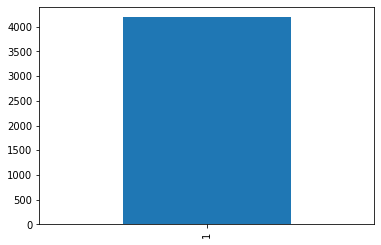

In [13]:
train_data[train_data.duplicated()]['age_group'].value_counts().plot(kind = 'bar')

New train set:  (484688, 25)


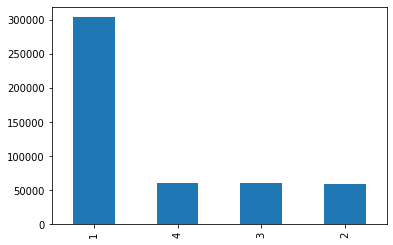

In [14]:
train_unq = train_data.drop_duplicates()
print('New train set: ',train_unq.shape)
X = train_unq.drop('age_group',axis = 1)
y = train_unq['age_group']
y.value_counts().plot(kind = 'bar')
plt.show()

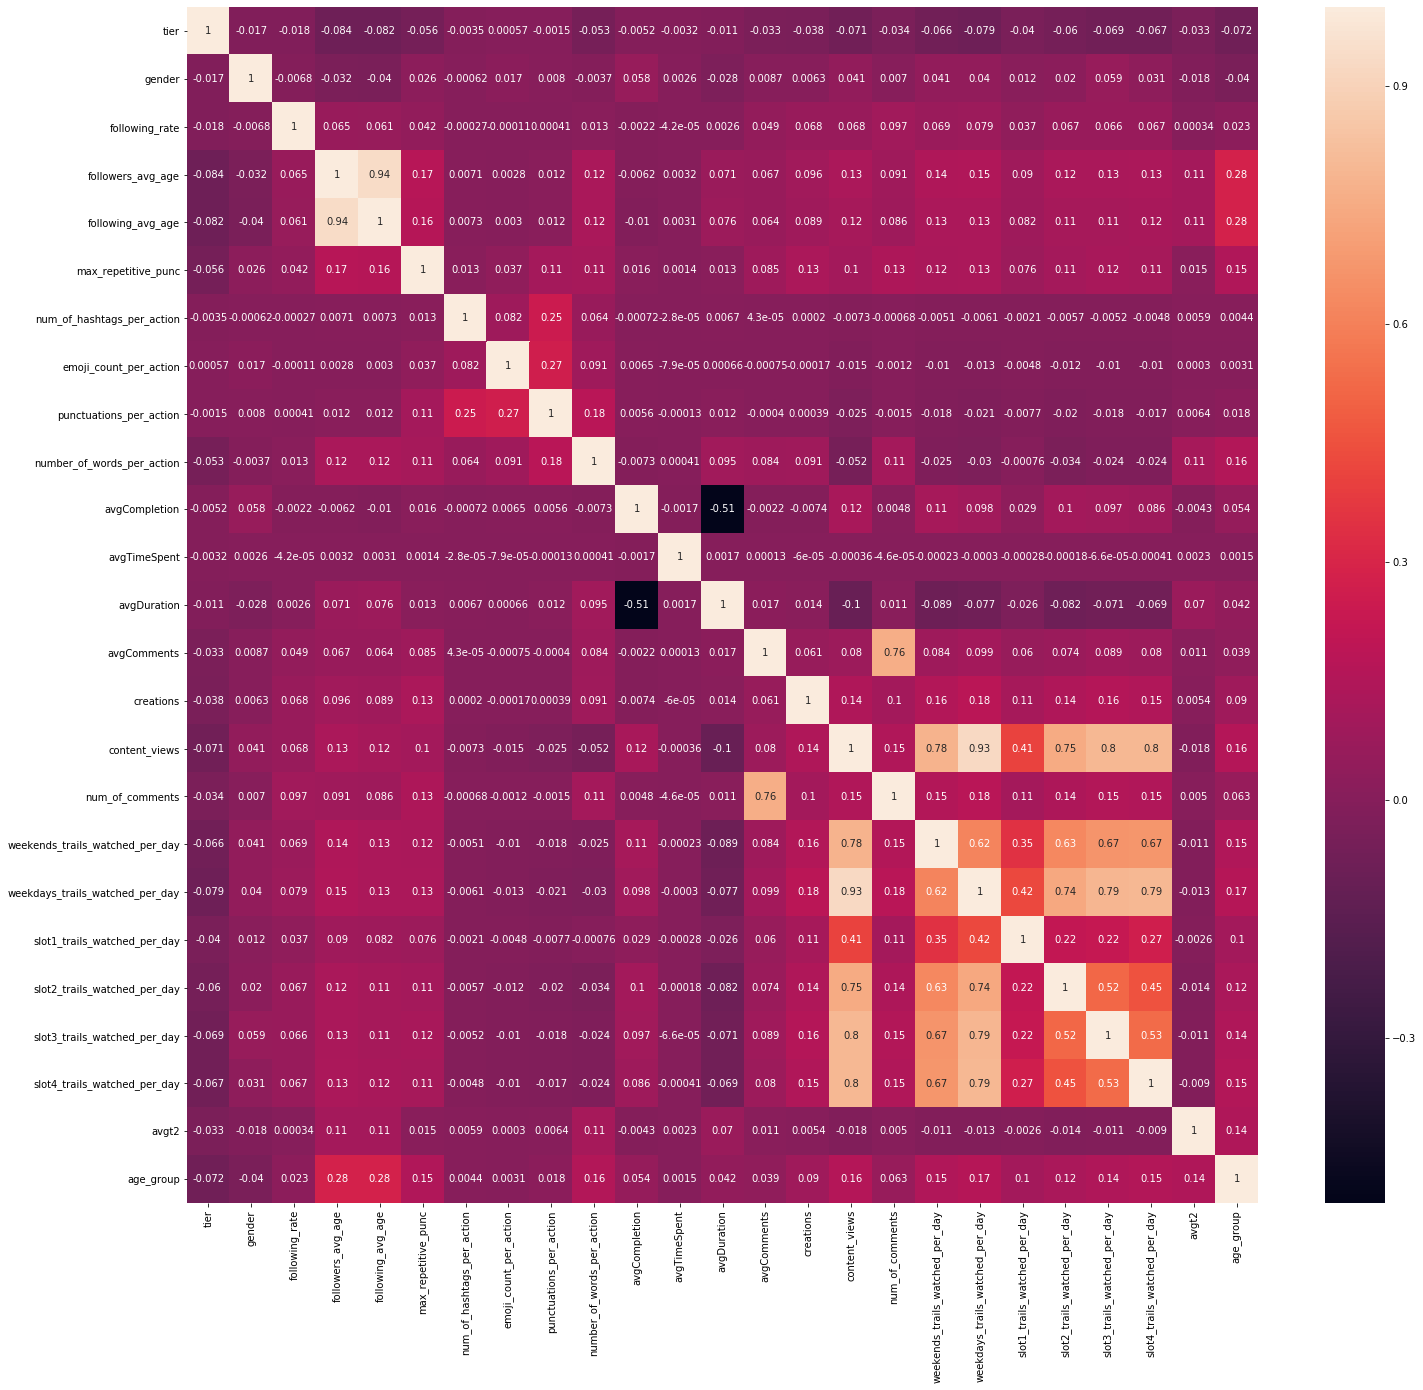

In [15]:
f,ax = plt.subplots(figsize=(24,22))
corrmat = train_unq.corr()
sns.heatmap(corrmat,annot=True,
           xticklabels=corrmat.columns.values,
           yticklabels=corrmat.columns.values)

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import  SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import make_pipeline

In [17]:
model = XGBClassifier()

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
from sklearn.metrics import f1_score
model.fit(X_train, Y_train)
preds = model.predict(X_test)
score = f1_score(Y_test, preds, average='weighted')
print('F1:', score)

F1: 0.7199307945143419


In [20]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(solver = 'lbfgs', max_iter= 500, multi_class='multinomial')
model_log.fit(X_train, Y_train)
pred_log = model_log.predict(X_test)
score_log =f1_score(Y_test, pred_log, average='weighted')
print('F1_log:', score_log)

F1_log: 0.5624914905312138


In [21]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, Y_train)
pred_dec = classifier.predict(X_test)
score_dec =f1_score(Y_test, pred_dec, average='weighted', labels=np.unique(pred_dec))
print('F1_dec:', score_dec)

F1_dec: 0.7612380414945509


In [22]:
test_predicts = classifier.predict(test_df)
output = pd.DataFrame({'prediction': test_predicts})
output.to_csv('submissionA2.csv', index=False)